# MoBioFP - Fingerphoto Recognition with Fingerip Object Detection

## Import Python libraries

In [1]:
import cv2
import mobiofp
import fingerprint_enhancer
import matplotlib.pyplot as plt

from rembg import remove
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator
from pathlib import Path

## Define global constants

In [2]:
DATA_DIR = "../data"
PROCESSED_DIR = DATA_DIR + '/processed'
IMAGE_PATH = DATA_DIR + '/raw/samples/44_i_1_w_7.jpg'
MODELS_DIR = "../models"
MODEL_CHECKPOINT_PATH = MODELS_DIR + "/yolo8n256-v2/arm64/weights/best.pt"

## Load a YOLOv8 pre-trained model

In [3]:
model = YOLO(MODEL_CHECKPOINT_PATH)
model.info()

Model summary: 225 layers, 3011043 parameters, 0 gradients, 8.2 GFLOPs


(225, 3011043, 0, 8.1941504)

## Read RGB sample image

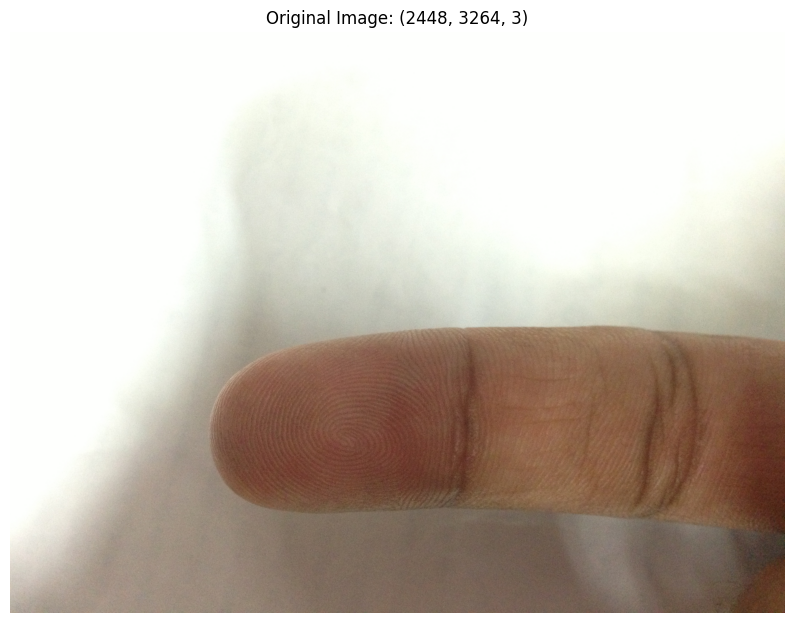

In [4]:
image = cv2.imread(IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = mobiofp.rotate_image(image, 90)

mobiofp.plot_image(image, title=f"Original Image: {image.shape}")

## Fingertip detection using YOLOv8n pre-trained model


0: 480x640 1 Fingertip, 53.6ms
Speed: 2.4ms preprocess, 53.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


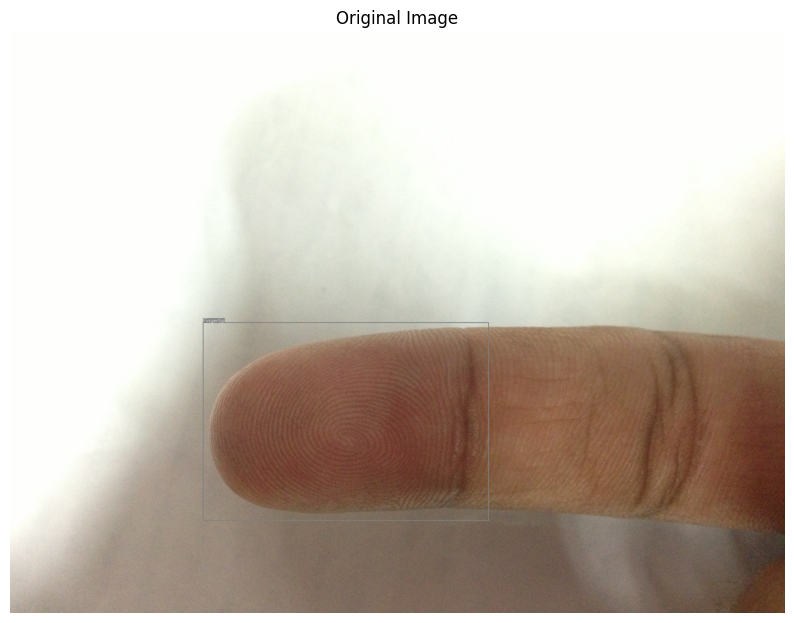

In [5]:
results = model.predict(image, show=False)
assert len(results) > 0, "No objects detected in the image"

boxes = results[0].boxes.xyxy.cpu().tolist()
clss = results[0].boxes.cls.cpu().tolist()
image_copy = image.copy()
annotator = Annotator(image_copy, line_width=2, font_size=20)

if boxes is not None:
    box = boxes[0]
    cls = clss[0]
    annotator.box_label(box, label=model.names[int(cls)])
    # mobiofp.plot_image(annotator.result(), title=f"Detected Object: {model.names[int(cls)]}")
    # for box, cls in zip(boxes, clss):
mobiofp.plot_image(annotator.result())
    #     # crop_obj = im0[int(box[1]):int(box[3]), int(box[0]):int(box[2])]


In [6]:



print(res)
# results = model.predict(image)
# annotator = Annotator()
# boxes = results[0].boxes
# box = boxes[0]
# b = box.xyxy[0]
# c = box.cls
# annotator.box_label(b, model.names[int(c)])
# img = annotator.result() 

# mobiofp.plot_image(img, title="Predicted Image")


NameError: name 'res' is not defined

In [ ]:
from threading import Thread

Thread(target=model.safe_predict, args=image).start()
# Thread(target=model.safe_predict, args=(image)).start()

In [ ]:
lbox = b.numpy().tolist()

mobiofp.plot_image(image, title=f"Original Image: {image.shape}")
mobiofp.plot_img_bbox(image, lbox, bbox_title="Fingertip")


In [ ]:
# results = model(image)[0]
# box_xyxy = results.boxes.xyxy[0].int().cuda().cpu().numpy()

# print(f"\nPredicted box: {box_xyxy}")

# x, y, w, h = box_xyxy
# image_box = image.copy()
# cv2.rectangle(image_box, (x, y), (w, h), (0, 0, 255), 2)

# plt.figure(figsize=(10, 10))
# plt.subplot(1, 2, 1)
# plt.imshow(image)
# plt.title('Original image')
# plt.axis('off')
# plt.subplot(1, 2, 2)
# plt.imshow(image_box)
# plt.title('Bounding box')
# plt.axis('off')
# plt.tight_layout()
# plt.show()


# fingertip_mask = remove(fingertip, only_mask=True)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
# fingertip_mask = cv2.morphologyEx(fingertip_mask, cv2.MORPH_OPEN, kernel, iterations=2)
# fingertip_mask = cv2.GaussianBlur(fingertip_mask, (5, 5), sigmaX=2, sigmaY=2, borderType=cv2.BORDER_DEFAULT)
# fingertip_mask = np.where(fingertip_mask < 127, 0, 255).astype(np.uint8)

# plt.figure(figsize=(10, 10))
# plt.subplot(1, 3, 1)
# plt.imshow(fingertip, cmap="gray")
# plt.title('Original fingertip')
# plt.axis('off')
# plt.subplot(1, 3, 2)
# plt.imshow(fingertip_mask, cmap="gray")
# plt.title("Binary Mask: Baground Removal")
# plt.axis('off')
# plt.subplot(1, 3, 3)
# plt.imshow(cv2.bitwise_and(fingertip, fingertip, mask=fingertip_mask))
# plt.title("Fingertip with background removed")
# plt.axis('off')
# plt.tight_layout()
# plt.show()
